In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Libraries**

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [49]:
#load datasets
df = pd.read_csv('/content/drive/MyDrive/Google Colabs Dibimbing.id/supermarket_sales - Sheet1.csv')


In [50]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Data Exploration and Cleaning

In [56]:
df.shape

(1000, 17)

In [57]:
df.keys()

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [58]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [59]:
# index changed to Date
df.set_index('Invoice ID', inplace=True)
 

In [60]:
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 750-67-8428 to 849-09-3807
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income

In [62]:
# Di sini kita memiliki Tanggal dan Waktu sebagai objek, mengubah tipenya menjadi tanggal dan waktu
df['Date']

Invoice ID
750-67-8428     1/5/2019
226-31-3081     3/8/2019
631-41-3108     3/3/2019
123-19-1176    1/27/2019
373-73-7910     2/8/2019
                 ...    
233-67-5758    1/29/2019
303-96-2227     3/2/2019
727-02-1313     2/9/2019
347-56-2442    2/22/2019
849-09-3807    2/18/2019
Name: Date, Length: 1000, dtype: object

In [63]:
df['Date'] = pd.to_datetime(df['Date'])

In [64]:
df['Time'] = pd.to_datetime(df['Time'])

### Menambahkan kolom hari, bulan, tahun dan jam

In [65]:
df['Day'] = (df['Date']).dt.day
df['Month'] = (df['Date']).dt.month
df['Year'] = (df['Date']).dt.year
df['Hour'] = (df['Time']).dt.hour 

In [66]:
df['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12])

In [67]:
df['Month'].unique()

array([1, 3, 2])

In [68]:
df['Year'].unique()

array([2019])

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 750-67-8428 to 849-09-3807
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Branch                   1000 non-null   object        
 1   City                     1000 non-null   object        
 2   Customer type            1000 non-null   object        
 3   Gender                   1000 non-null   object        
 4   Product line             1000 non-null   object        
 5   Unit price               1000 non-null   float64       
 6   Quantity                 1000 non-null   int64         
 7   Tax 5%                   1000 non-null   float64       
 8   Total                    1000 non-null   float64       
 9   Date                     1000 non-null   datetime64[ns]
 10  Time                     1000 non-null   datetime64[ns]
 11  Payment                  1000 non-null   object        
 12  cogs                  

In [70]:
df.isnull().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Day                        0
Month                      0
Year                       0
Hour                       0
dtype: int64

## Statistical data

In [71]:
#Statistical summary

df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270,15.256000,1.993000,2019.0,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858,8.693563,0.835254,0.0,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000,31.000000,3.000000,2019.0,20.000000


Kita dapat melihat bahwa mean dan median tidak memiliki banyak perbedaan, oleh karena itu ada outlier minimum atau nilainya seimbang di sisi positif dan negatif.

In [72]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778,0.057021,-0.027387,NaN,0.008242
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815,-0.043347,-0.014524,NaN,-0.007317
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.022301,NaN,-0.002770
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.022301,NaN,-0.002770
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.022301,NaN,-0.002770
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.022301,NaN,-0.002770
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000,-0.007076,-0.042880,NaN,-0.030588
Day,0.057021,-0.043347,-0.002515,-0.002515,-0.002515,NaN,-0.002515,-0.007076,1.000000,-0.118996,NaN,0.020668
Month,-0.027387,-0.014524,-0.022301,-0.022301,-0.022301,NaN,-0.022301,-0.042880,-0.118996,1.000000,NaN,0.043762


In [75]:
df_corr = np.round(df.corr(),2)

In [76]:
df_corr

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
Unit price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01,0.06,-0.03,NaN,0.01
Quantity,0.01,1.00,0.71,0.71,0.71,NaN,0.71,-0.02,-0.04,-0.01,NaN,-0.01
Tax 5%,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00
Total,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00
cogs,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00,-0.01,-0.04,NaN,-0.03
Day,0.06,-0.04,-0.00,-0.00,-0.00,NaN,-0.00,-0.01,1.00,-0.12,NaN,0.02
Month,-0.03,-0.01,-0.02,-0.02,-0.02,NaN,-0.02,-0.04,-0.12,1.00,NaN,0.04


## Exploratory Data Analysis

Plotting correlation between columns

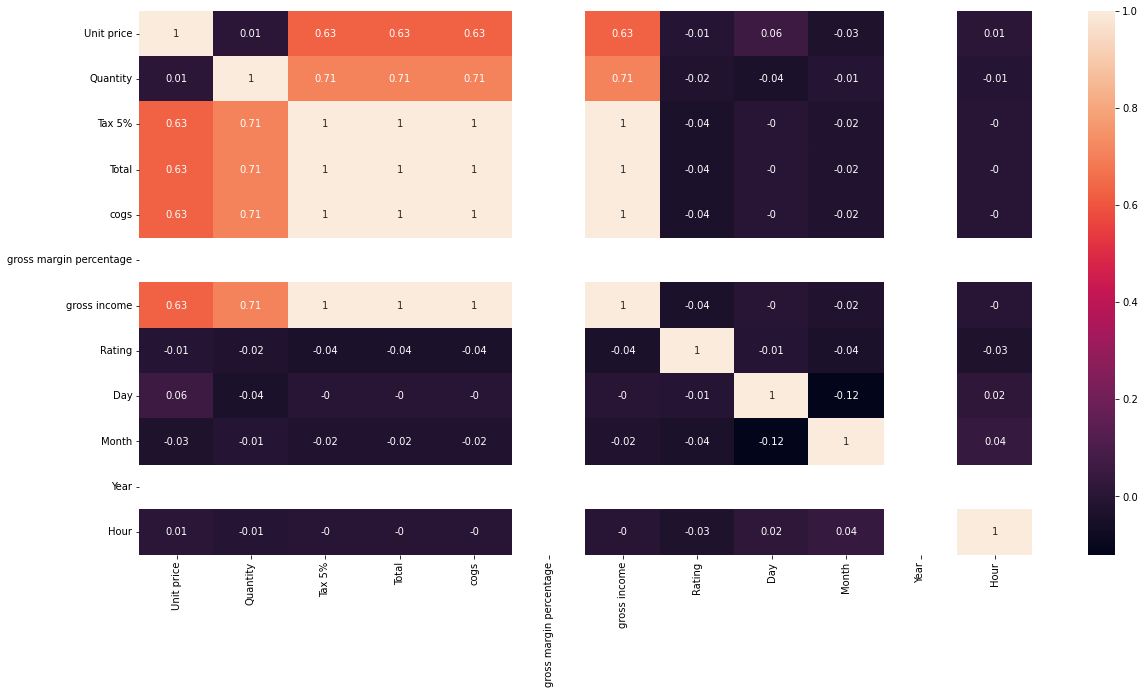

In [77]:
plt.figure(figsize=(20,10))
sns.heatmap(df_corr, annot=True)

Korelasi tertinggi yang dapat kita tarik dari peta panas di atas adalah antara Kuantitas dan Pajak, Kuantitas dan Total Penjualan, Kuantitas dan Penggerak, Kuantitas dan Pendapatan Kotor. Korelasinya adalah 0,71 di masing-masing di atas.

Mari kita plot penjualan per jam

Text(0, 0.5, 'Quantity')

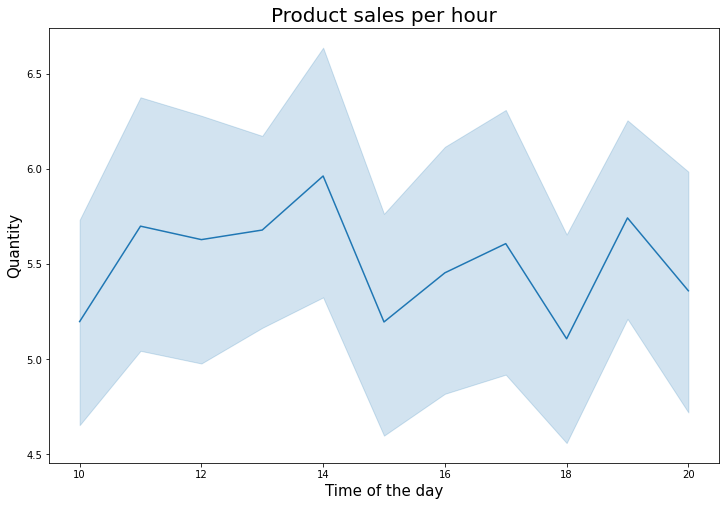

In [78]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Hour',y='Quantity',data=df)
plt.title('Product sales per hour', fontsize=20)
plt.xlabel('Time of the day', fontsize=15)
plt.ylabel('Quantity', fontsize=15)

Kita dapat melihat bahwa penjualan tertinggi pada jam 2 siang. Volume penjualan yang baik tercatat sekitar jam 5 sore dan 7 malam. Penjualan tercatat paling rendah sekitar pukul 10 malam, 3 sore dan 4 sore.

Plotting sales per day

Text(0, 0.5, 'Quantity')

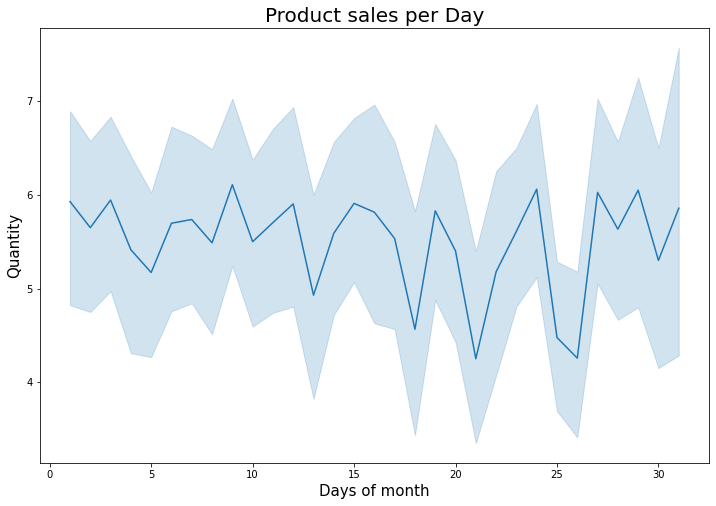

In [81]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Day',y='Quantity',data=df,)
plt.title('Product sales per Day',fontsize=20)
plt.xlabel('Days of month',fontsize=15)
plt.ylabel('Quantity',fontsize=15)

On an average we can see that the sales of products per day is unevenly distributed. There cannot be any pattern drawn.

Lets try for month wise

Text(0, 0.5, 'Quantity')

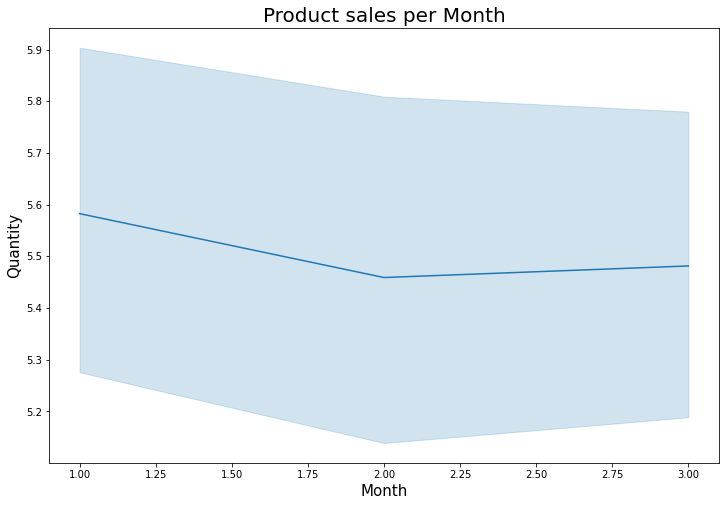

In [82]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Month',y='Quantity',data=df)
plt.title('Product sales per Month',fontsize=20)
plt.xlabel('Month',fontsize=15)
plt.ylabel('Quantity',fontsize=15)

Hasil terjemahan
Bisa kita lihat di tahun 2019, penjualan selama 3 bulan ini hampir sama

### Top 10 products with most/least transactions
We need to perform group by aggregation. Basis group-by is `Description`, while number of transactions = count `InvoiceNo`. After aggregating, do appropriate sorting and truncation.

In [83]:
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
Invoice ID,,,,,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-10-11 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,13
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-10-11 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,10
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-10-11 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,13
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-10-11 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,20
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-10-11 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2022-10-11 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,29,1,2019,13
303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,2022-10-11 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,2,3,2019,17
727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2022-10-11 13:22:00,Cash,31.84,4.761905,1.5920,7.7,9,2,2019,13


In [86]:
# Top 10 products with the most transactions
top10_prod = (df
            .groupby('Product line') 
            .agg(num_trx=('Gender','count'))
            .reset_index()
            .sort_values('num_trx',ascending=False)
            .head(10)
            )
top10_prod

,Product line,num_trx
1,Fashion accessories,178
2,Food and beverages,174
0,Electronic accessories,170
5,Sports and travel,166
4,Home and lifestyle,160
3,Health and beauty,152


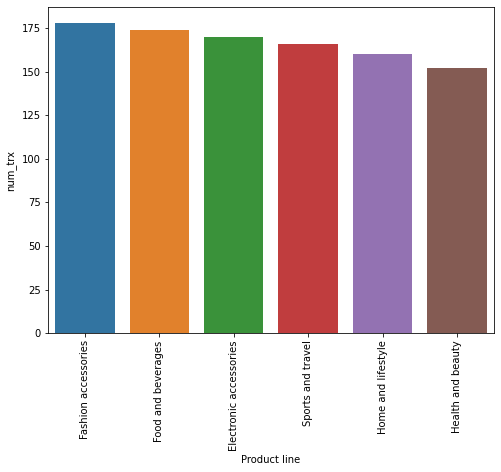

In [88]:
# visualize it
plt.figure(figsize=(8,6))
sns.barplot(data=top10_prod, x='Product line', y='num_trx')
plt.xticks(rotation=90)
plt.show()

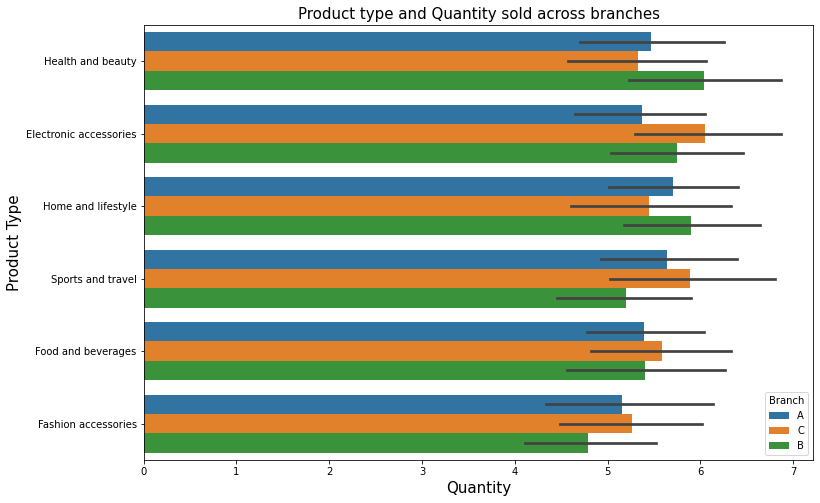

In [89]:
plt.figure(figsize=(12,8))
sns.barplot(x='Quantity',y='Product line',hue='Branch',data= df)
plt.title('Product type and Quantity sold across branches',fontsize=15)
plt.xlabel('Quantity',fontsize=15)
plt.ylabel('Product Type',fontsize=15)
plt.show()

Cabang B memimpin dalam penjualan Kesehatan dan kecantikan tetapi pembelian Aksesori Mode terendah. Cabang C memimpin dalam Aksesoris Elektronik dan Olahraga dan perjalanan, ia telah mendapat volume yang adil dari semua kategori.

### Top 10 Customers in money spend
We need to create a new column `total_price = Quantity * UnitPrice`. Then sum it based on group-by CustomerID.

In [90]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
Invoice ID,,,,,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-10-11 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,13
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-10-11 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,10
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-10-11 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,13
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-10-11 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,20
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-10-11 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,10


In [93]:
# create total_price column
df['total'] = df['Quantity'] * df['Unit price']

# group by aggregation
top10_cust = (df
            .groupby('Invoice ID')
            .agg(total_spend=('total','sum'))
            .reset_index()
            .sort_values('total_spend',ascending=False)
            .head(10)
            )

top10_cust

,Invoice ID,total_spend
949,860-79-0874,993.0
721,687-47-8271,989.8
223,283-26-5248,985.2
816,751-41-9720,975.0
250,303-96-2227,973.8
800,744-16-7898,973.7
205,271-88-8734,972.1
156,234-65-2137,955.8
549,554-42-2417,954.4
281,325-77-6186,906.5


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

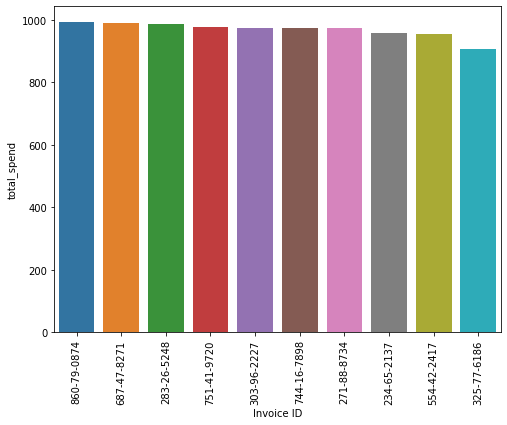

In [95]:
# visualize it
plt.figure(figsize=(8,6))
top10_cust['Invoice ID'] = top10_cust['Invoice ID'].astype(str)
sns.barplot(data=top10_cust, x='Invoice ID', y='total_spend')
plt.xticks(rotation=90)

### Distinct Product Sold and their price distribution
We need to create a sub-dataframe containing `Description` and `UnitPrice` columns only, and ensure no duplication.

In [97]:
prod = (df[['Product line','Unit price']]
        .drop_duplicates(subset='Product line',ignore_index=True))
prod.head()

,Product line,Unit price
0,Health and beauty,74.69
1,Electronic accessories,15.28
2,Home and lifestyle,46.33
3,Sports and travel,86.31
4,Food and beverages,54.84


In [98]:
# number of products
prod.shape[0]

6

In [100]:
prod['Product line'].nunique()

6

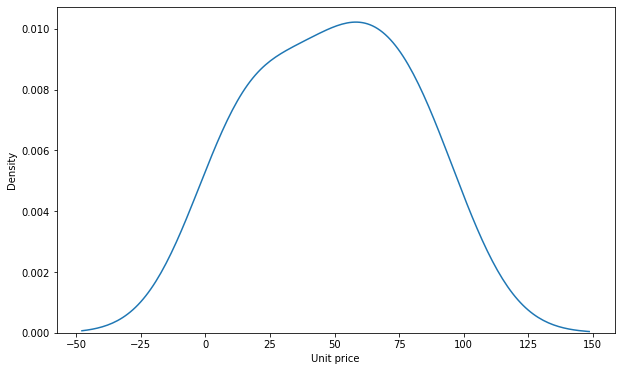

In [102]:
# price distribution
plt.figure(figsize=(10,6))
sns.kdeplot(data=prod, x='Unit price')

In [103]:
prod.describe()

,Unit price
count,6.000000
mean,48.655000
std,29.736178
min,14.480000
25%,23.042500
50%,50.585000
75%,69.727500
max,86.310000


### Customer City and which one is the best spender overall
We need to group by `City` and `Invoice ID`, then take the sum of `total`. After that, we draw boxplot side by side countries.

In [105]:
df.head(2)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,...,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,total
Invoice ID,,,,,,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,...,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,13,522.83
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,...,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,10,76.40


In [107]:
city_user = (df
                .groupby(['City','Invoice ID'])
                .agg(total_spend=('total','sum'))
                .reset_index())
city_user.head()

,City,Invoice ID,total_spend
0,Mandalay,109-28-2512,585.66
1,Mandalay,109-86-4363,420.56
2,Mandalay,110-48-7033,130.48
3,Mandalay,114-35-5271,463.28
4,Mandalay,115-99-4379,383.11


In [108]:
city_user['City'].nunique()

3

In [109]:
city_user.City.value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

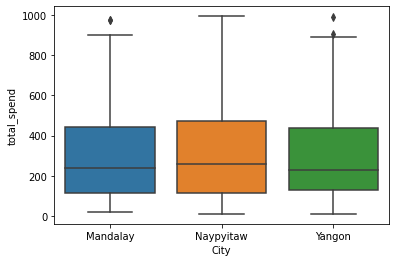

In [111]:
sns.boxplot(data=city_user,
            x='City',
            y='total_spend')

In [112]:
# Clip max spend at 500 so that we can easily compare the boxplots
city_user['total_spend'] = city_user['total_spend'].clip(upper=500)

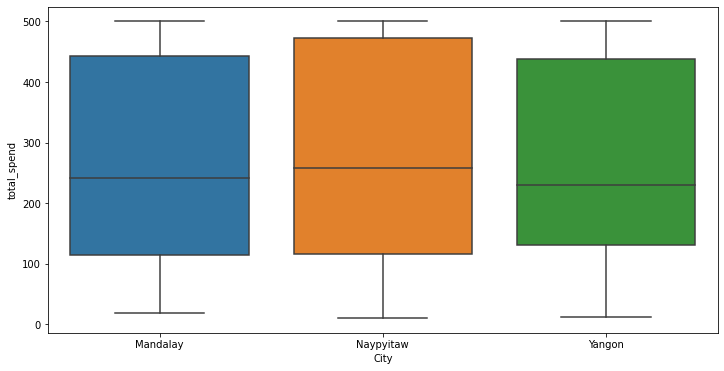

In [113]:
plt.figure(figsize=(12,6))
sns.boxplot(data=city_user,
            x='City',
            y='total_spend')

Insight
1. Korelasi tertinggi adalah 0,71 antara Quantity dan Pajak, Quantity dan Total Sales, Quantity dan Cogs, Quantity dan Gross Income.
2. Penjualan tertinggi pada jam 2 siang dan volume penjualan yang baik tercatat sekitar jam 5 sore dan 7 malam.
3. Kota Pelanggan dan mana yang merupakan pembelanja terbaik secara keseluruhan adalah Mandalay
4. 10 Pelanggan Teratas dalam membelanjakan uang adalah 993.0, 989.8, 985.2, 975.0, 973.8, 973.7, 972.1, 955.8, 954.4, 906.5
5. Produk Berbeda yang Dijual dan distribusi harganya adalah 
Health and beauty	74.69.
Electronic accessories	15.28
Home and lifestyle	46.33
Sports and travel	86.31
Food and beverages	54.84